In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi veri comfort love veri p...
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin v mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back love look feel thi pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti set two month


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi veri comfort love veri p...
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin v mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back love look feel thi pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti set two month


In [5]:
df.dropna(inplace=True)

In [8]:
df['length'] = df['text_'].apply(len)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text_     40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


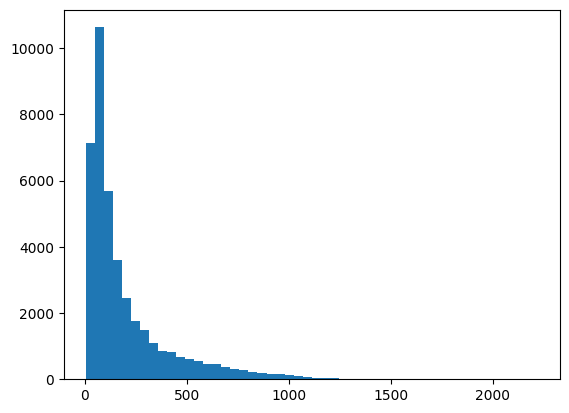

In [10]:
plt.hist(df['length'],bins=50)
plt.show()

In [11]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     168.694979  170.342446  9.0  55.0   97.0  209.0  1210.0  
OR     231.687426  246.774716  8.0  72.0  130.0  288.0  2216.0

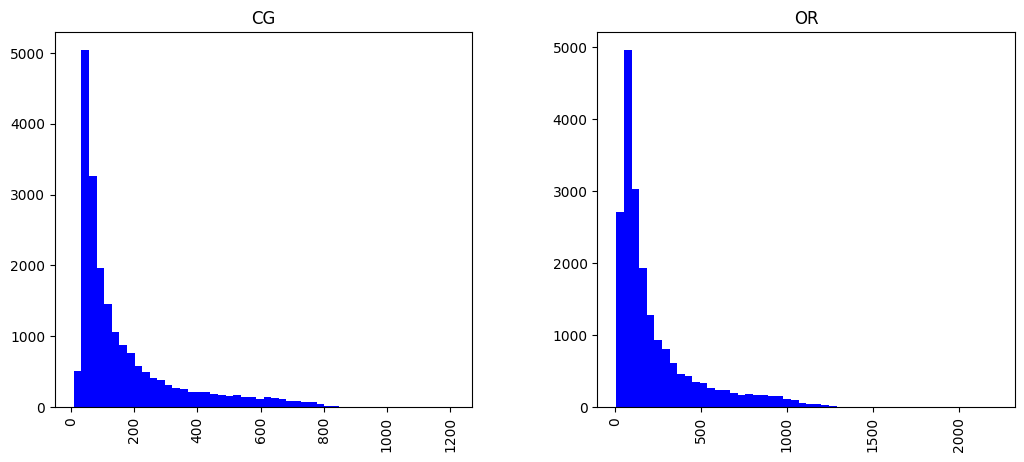

In [12]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

Let's extract the largest review...

In [13]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"thought 'd purcha thi item also nbsp data-hook= '' product-link-link '' class= '' a-link-norm '' href= '' /kidco-door-knob-locks-clear-2-pack/dp/b0010cd2io/ref=cm_cr_arp_d_rvw_txt ie=utf8 '' kidco door knob lock clear pack /a nbsp nbsp data-hook= '' product-link-link '' class= '' a-link-norm '' href= '' /door-knob-lock/dp/b00238meqa/ref=cm_cr_arp_d_rvw_txt ie=utf8 '' door knob lock /a white color nbsp data-hook= '' product-link-link '' class= '' a-link-norm '' href= '' /kidco-door-knob-lock-colors-white/dp/b001j2wjf2/ref=cm_cr_arp_d_rvw_txt ie=utf8 '' kidco door knob lock color white /a nbsp nbsp data-hook= '' product-link-link '' class= '' a-link-norm '' href= '' /door-knob-lock-2-pack/dp/b00069bvgm/ref=cm_cr_arp_d_rvw_txt ie=utf8 '' door knob lock pack /a nbsp data-hook= '' product-link-link '' class= '' a-link-norm '' href= '' /secure-grip-clear-door-knob-covers-3-pack/dp/b00068xbxe/ref=cm_cr_arp_d_rvw_txt ie=utf8 '' secur grip clear door knob cover 3-pack /a nbsp compar two overal

In [14]:
df.length.describe()

count    40431.000000
mean       200.191981
std        214.355951
min          8.000000
25%         62.000000
50%        113.000000
75%        246.500000
max       2216.000000
Name: length, dtype: float64

In [12]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [16]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x00000230F577C680>)

In [20]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34623


In [18]:
review4 = df['text_'][3]
review4

'miss inform use great product price'

In [22]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 13702)	1
  (0, 15954)	1
  (0, 19966)	1
  (0, 23990)	1
  (0, 24118)	1
  (0, 32355)	1
(1, 34623)


There are 6 unique words in the 4th review.

In [23]:
print(bow_transformer.get_feature_names_out()[15841])
print(bow_transformer.get_feature_names_out()[23848])

incorrig
predatori


In [24]:
bow_reviews = bow_transformer.transform(df['text_'])

In [25]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 34623)
Amount of non zero values in the bag of words model: 1080151


In [26]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.08


In [27]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13702)	1
  (0, 15954)	1
  (0, 19966)	1
  (0, 23990)	1
  (0, 24118)	1
  (0, 32355)	1


In [28]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.821684385176731


In [29]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 34623)
No. of Dimensions: 2


## Creating training and testing data

In [30]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [31]:
review_test

17593    great look compact knife give full access cut ...
573      super nice perfect wine glass onli problem kin...
33638    veri nice qualiti skirt granddaught love hard ...
30640    thi wa favorit book read even thought u might ...
35991    daughter ask thi set love also love music colo...
                               ...                        
4127                      thi fantast item hand feel great
33203    son wa realli exciti thi toy littl bigger thought
31780    primari plot line two main charact father daug...
10589    veri nice qualiti averag plu mean r well worth...
24978    enjoy thi version great companion ani bibl stu...
Name: text_, Length: 14151, dtype: object

In [32]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

## Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data

In [11]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

NameError: name 'text_process' is not defined

In [ ]:

pipeline.fit(review_train,label_train)

In [ ]:
predictions = pipeline.predict(review_test)
predictions

In [48]:
model.predict(['Does the job but thinner than a professional blender?  I will say that its a pretty good'])

array(['OR'], dtype='<U2')

In [5]:
import pickle

# Save the pipeline to a pickle file
with open("model.pkl", "wb") as f:
    pickle.dump(pipeline, f)


NameError: name 'pipeline' is not defined

In [13]:
import pickle

# Load the pre-trained model from the model.pkl file
with open('pipeline.pkl', 'rb') as file:
    model = pickle.load(file)


In [16]:

# Use the pipeline to make predictions
model.predict(['Prossersor is good but the ipad is good also addiction.Media player experience is outstanding'])


array(['CG'], dtype='<U2')

In [45]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

NameError: name 'label_test' is not defined

In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 85.24%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021F7471D940>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'CG', 'OR'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.80      0.89      0.84      7032
          OR       0.88      0.78      0.83      7119

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix: [[6244  788]
 [1539 5580]]
Accuracy Score: 0.835559324429369
Model Prediction Accuracy: 83.56%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021F7471D940>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['OR', 'CG', 'CG', ..., 'OR', 'OR', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.72      0.75      0.74      7032
          OR       0.75      0.71      0.73      7119

    accuracy                           0.73     14151
   macro avg       0.73      0.73      0.73     14151
weighted avg       0.73      0.73      0.73     14151

Confusion Matrix: [[5305 1727]
 [2046 5073]]
Accuracy Score: 0.7333757331637341
Model Prediction Accuracy: 73.34%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021F7471D940>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['CG', 'CG', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.54      0.97      0.69      7032
          OR       0.86      0.19      0.31      7119

    accuracy                           0.58     14151
   macro avg       0.70      0.58      0.50     14151
weighted avg       0.70      0.58      0.50     14151

Confusion Matrix: [[6818  214]
 [5777 1342]]
Accuracy Score: 0.5766376934492262
Model Prediction Accuracy: 57.66%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021F7471D940>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [ ]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['CG', 'CG', 'CG', ..., 'OR', 'OR', 'OR'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.89      0.87      0.88      7032
          OR       0.87      0.89      0.88      7119

    accuracy                           0.88     14151
   macro avg       0.88      0.88      0.88     14151
weighted avg       0.88      0.88      0.88     14151

Confusion Matrix: [[6101  931]
 [ 752 6367]]
Accuracy Score: 0.8810684757260971
Model Prediction Accuracy: 88.11%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [20]:
pipeline.fit(review_train,label_train)

NameError: name 'review_train' is not defined

In [ ]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['CG', 'CG', 'CG', ..., 'OR', 'OR', 'OR'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.86      0.85      0.86      7032
          OR       0.86      0.87      0.86      7119

    accuracy                           0.86     14151
   macro avg       0.86      0.86      0.86     14151
weighted avg       0.86      0.86      0.86     14151

Confusion Matrix: [[5996 1036]
 [ 938 6181]]
Accuracy Score: 0.8605045579817681
Model Prediction Accuracy: 86.05%


# Conclusion

In [ ]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 86.05%
K Nearest Neighbors Prediction Accuracy: 57.66%
Decision Tree Classifier Prediction Accuracy: 73.34%
Random Forests Classifier Prediction Accuracy: 83.56%
Support Vector Machines Prediction Accuracy: 88.11%
Multinomial Naive Bayes Prediction Accuracy: 84.35%
